### Linear Regressin Using sklearn built in class

#### The sklearn uses the OLS (ordinary least square) technique for calculating slope m and y_intercept b using formulas

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [132]:
df = pd.read_csv(r"F:\Python 2024\ML Algorithms\ML Datasets\placement al1.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


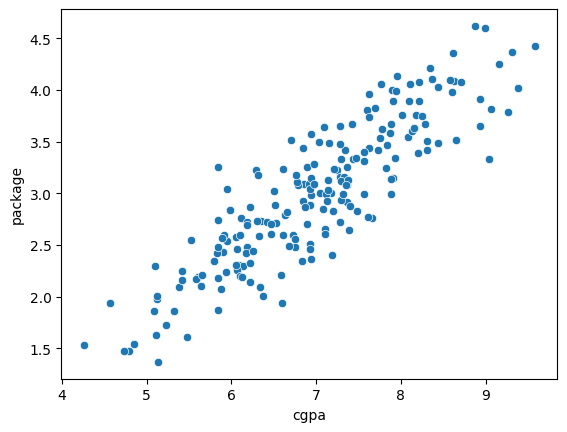

In [4]:
sns.scatterplot(x = 'cgpa',y = 'package',data =df)
plt.show()

In [24]:
data = df['cgpa']
target = df['package']
print(data)
print(data.shape)
print(data.info())

0      6.89
1      5.12
2      7.82
3      7.42
4      6.94
       ... 
195    6.93
196    5.89
197    7.21
198    7.63
199    6.22
Name: cgpa, Length: 200, dtype: float64
(200,)
<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: cgpa
Non-Null Count  Dtype  
--------------  -----  
200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB
None


In [42]:
dta = df.iloc[:,0] # Another way to seperates cols
dta.head(2)

0    6.89
1    5.12
Name: cgpa, dtype: float64

In [44]:
label = df.iloc[:,-1]         # Another way to seperates cols
label.head(2)

0    3.26
1    1.98
Name: package, dtype: float64

In [6]:
print(target)
print(target.shape)

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64
(200,)


In [45]:
Xtrain,Xtest,ytrain,ytest = train_test_split(dta,label,test_size = 0.2,random_state = 2)

In [46]:
print(Xtrain.shape)
print(Xtest.shape)

(160,)
(40,)


In [57]:
Xtest.iloc[0]

np.float64(8.58)

In [48]:
lr = LinearRegression()

In [55]:
# lr.fit(Xtrain.values.reshape(-1,1),ytrain.values.reshape(-1,1))
lr.fit(Xtrain.values.reshape(-1,1),ytrain.values.reshape(-1,1))

LinearRegression()

In [61]:
lr.predict(Xtest.iloc[1].reshape(1,1))

array([[3.09324469]])

###  Now To see Parameter of Predicted lines drawn over the data can be seen below

In [101]:
y_intercept = lr.intercept_
y_intercept.shape   # thi is the value of b in line y = mx + b

(1,)

In [108]:
slope = lr.coef_
slope          # this is the value of m in the line y = mx + b . Where m is the coeficient of x
slope.shape

(1, 1)

In [112]:
# Now to Draw that line on our data  
yPredict_line = (slope * data.values + y_intercept).flatten()


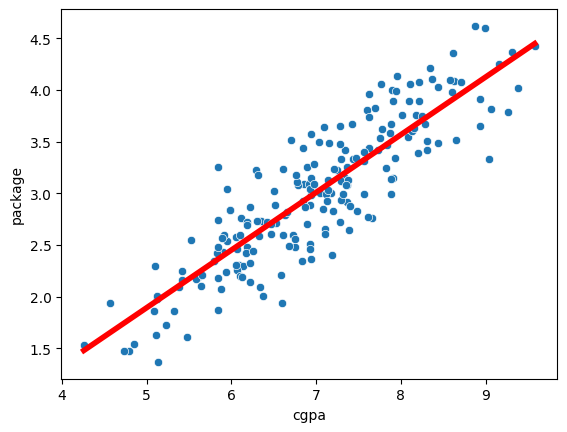

In [126]:
sns.scatterplot(x = 'cgpa', y= 'package',data =df)
sns.lineplot(x = data.values,y = yPredict_line,color = 'red',lw = 4)
plt.show()



### OR We can use the Model to draw the line instead of manual calculation with slope and y_intercept

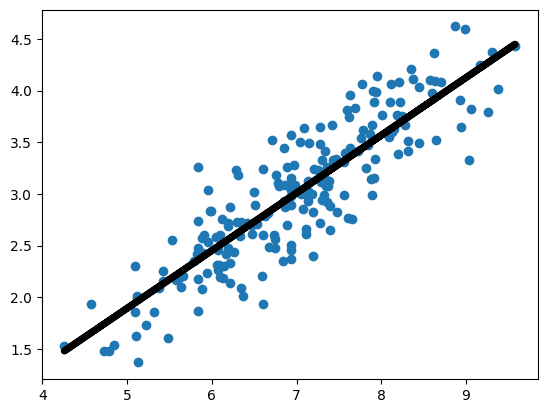

In [131]:
Xtrain = np.array(Xtrain).reshape(-1, 1)
plt.scatter(x = 'cgpa', y= 'package',data =df)
plt.plot(Xtrain,lr.predict(Xtrain),lw = 5,color = 'k')
